In [1]:
import pandas as pd

import seaborn as sns

In [2]:
df = pd.read_csv("dataset.csv")

### Exploratory

In [3]:
df

,user_id,created_at,event
0,1,2019-11-27 11:22,category-5-registered
1,1,2019-11-27 11:24,category-5-completed-profile
2,1,2019-11-27 11:24,category-5-started-application
3,2,2019-11-27 11:27,category-5-registered
4,2,2019-11-27 11:28,category-5-completed-profile
...,...,...,...
26835,3914,2020-03-15 23:22,category-5-entered-checkout
26836,3914,2020-03-15 23:22,category-5-shipping-info
26837,3914,2020-03-15 23:22,category-5-payment-info
26838,76,2020-03-16 9:57,category-3-entered-checkout


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26840 entries, 0 to 26839
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     26840 non-null  int64 
 1   created_at  26840 non-null  object
 2   event       26840 non-null  object
dtypes: int64(1), object(2)
memory usage: 629.2+ KB


In [5]:
# general info

In [6]:
# finding unique user total
len(df["user_id"].unique())

5005

In [7]:
# checking date length
df["created_at"] = pd.to_datetime(df["created_at"])
df["created_at"][-1:] - df["created_at"][0]

26839   109 days 22:35:00
Name: created_at, dtype: timedelta64[ns]

In [8]:
df["event"].value_counts()

category-5-registered              2345
category-3-registered              2342
category-3-started-application     2240
category-3-completed-profile       2117
category-5-started-application     1996
category-5-completed-profile       1914
category-5-finished-application    1609
category-3-finished-application    1593
category-3-entered-checkout        1506
category-5-entered-checkout        1322
category-3-shipping-info           1275
category-5-shipping-info           1061
category-5-payment-info             847
category-3-payment-info             831
category-3-fully-complete           557
category-5-fully-complete           525
category-1-started-application      365
category-1-finished-application     253
category-1-entered-checkout         215
category-1-shipping-info            184
category-1-completed-profile        179
category-1-registered               161
category-7-started-application      152
category-1-payment-info             137
category-7-finished-application     125


In [9]:
# creating 2 more columns from event
category = []
process = []
for i in df["event"]:
    z = i.split("-")[1]
    category.append(z)
    y = i.split("-",2)[2]
    process.append(y)
    
df["category"] = category
df["process"] = process

In [10]:
df["process"] = df["process"].str.replace("-", " ")

In [11]:
df

,user_id,created_at,event,category,process
0,1,2019-11-27 11:22:00,category-5-registered,5,registered
1,1,2019-11-27 11:24:00,category-5-completed-profile,5,completed profile
2,1,2019-11-27 11:24:00,category-5-started-application,5,started application
3,2,2019-11-27 11:27:00,category-5-registered,5,registered
4,2,2019-11-27 11:28:00,category-5-completed-profile,5,completed profile
...,...,...,...,...,...
26835,3914,2020-03-15 23:22:00,category-5-entered-checkout,5,entered checkout
26836,3914,2020-03-15 23:22:00,category-5-shipping-info,5,shipping info
26837,3914,2020-03-15 23:22:00,category-5-payment-info,5,payment info
26838,76,2020-03-16 09:57:00,category-3-entered-checkout,3,entered checkout


In [12]:
df["category"].value_counts()

3    12461
5    11619
1     1583
7      806
6      133
4      119
2      119
Name: category, dtype: int64

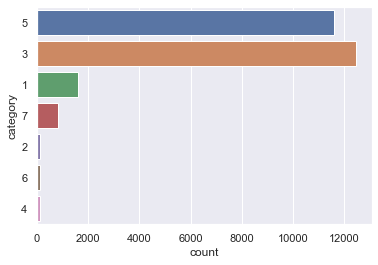

In [13]:
sns.set_theme(style="darkgrid")

ax = sns.countplot(y="category", data=df)

# Total Values

In [14]:
df["process"].value_counts()

registered              5002
started application     4848
completed profile       4345
finished application    3650
entered checkout        3185
shipping info           2644
payment info            1921
fully complete          1245
Name: process, dtype: int64

In [15]:
# finding how far each unique user_id got in the process, with all categories
# order follows above value count
for i in df["process"].value_counts():
    z = i / len(df["user_id"].unique())
    print(z)

0.9994005994005994
0.9686313686313687
0.8681318681318682
0.7292707292707292
0.6363636363636364
0.5282717282717283
0.3838161838161838
0.24875124875124874


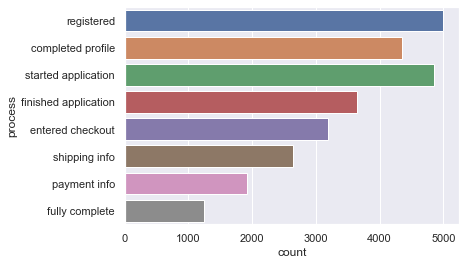

In [16]:
hues = df["process"].unique()

sns.set_theme(style="darkgrid")

ax = sns.countplot(y="process", data=df, order=hues)

### Category 1

In [17]:
df_cat_1 = df[df["category"] == "1"]
print("Amount of entries for the category 1 product: " + str(len(df_cat_1)))
df_cat_1["process"].value_counts()

Amount of entries for the category 1 product: 1583


started application     365
finished application    253
entered checkout        215
shipping info           184
completed profile       179
registered              161
payment info            137
fully complete           89
Name: process, dtype: int64

In [18]:
# finding how far each unique user_id got in the process for category 1 products
# order follows above value count
for i in df_cat_1["process"].value_counts():
    z = i /len(df_cat_1["user_id"].unique())
    print(z)

1.1196319018404908
0.7760736196319018
0.6595092024539877
0.5644171779141104
0.549079754601227
0.4938650306748466
0.42024539877300615
0.27300613496932513


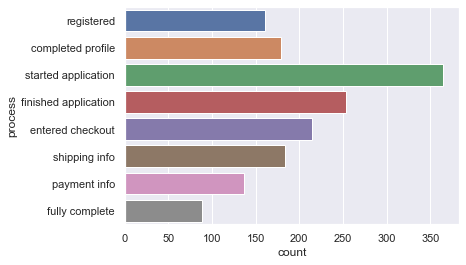

In [19]:
sns.set_theme(style="darkgrid")

ax = sns.countplot(y="process", data=df_cat_1, order=hues)

### Category 2

In [20]:
df_cat_2 = df[df["category"] == "2"]
print("Amount of entries for the category 2 product: " + str(len(df_cat_2)))
df_cat_2["process"].value_counts()

Amount of entries for the category 2 product: 119


started application     39
finished application    24
entered checkout        16
shipping info           11
registered              10
payment info             9
completed profile        7
fully complete           3
Name: process, dtype: int64

In [21]:
# finding how far each unique user_id got in the process for category 2 products
# order follows above value count
for i in df_cat_2["process"].value_counts():
    z = i /len(df_cat_2["user_id"].unique())
    print(z)

0.9069767441860465
0.5581395348837209
0.37209302325581395
0.2558139534883721
0.23255813953488372
0.20930232558139536
0.16279069767441862
0.06976744186046512


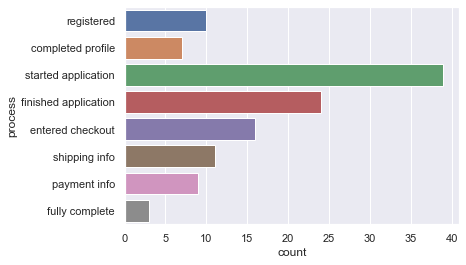

In [22]:
sns.set_theme(style="darkgrid")

ax = sns.countplot(y="process", data=df_cat_2, order=hues)

### Category 3

In [23]:
df_cat_3 = df[df["category"] == "3"]
print("Amount of entries for the category 3 product: " + str(len(df_cat_3)))
df_cat_3["process"].value_counts()

Amount of entries for the category 3 product: 12461


registered              2342
started application     2240
completed profile       2117
finished application    1593
entered checkout        1506
shipping info           1275
payment info             831
fully complete           557
Name: process, dtype: int64

In [24]:
# finding how far each unique user_id got in the process for category 3 products
# order follows above value count
for i in df_cat_3["process"].value_counts():
    z = i /len(df_cat_3["user_id"].unique())
    print(z)

0.9865206402695872
0.9435551811288964
0.8917438921651222
0.6710193765796124
0.6343723673125526
0.5370682392586352
0.35004212299915755
0.2346251053074979


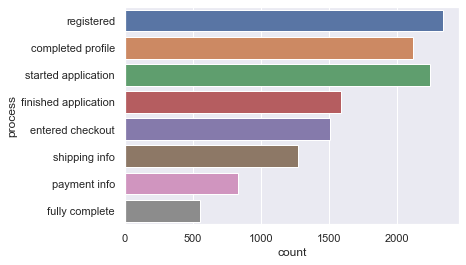

In [25]:
sns.set_theme(style="darkgrid")

ax = sns.countplot(y="process", data=df_cat_3, order=hues)

### Category 4

In [26]:
df_cat_4 = df[df["category"] == "4"]
print("Amount of entries for the category 4 product: " + str(len(df_cat_4)))
df_cat_4["process"].value_counts()

Amount of entries for the category 4 product: 119


started application     30
finished application    24
entered checkout        14
shipping info           12
completed profile       10
payment info            10
registered              10
fully complete           9
Name: process, dtype: int64

In [27]:
# finding how far each unique user_id got in the process for category 4 products
# order follows above value count
for i in df_cat_4["process"].value_counts():
    z = i /len(df_cat_4["user_id"].unique())
    print(z)

0.8571428571428571
0.6857142857142857
0.4
0.34285714285714286
0.2857142857142857
0.2857142857142857
0.2857142857142857
0.2571428571428571


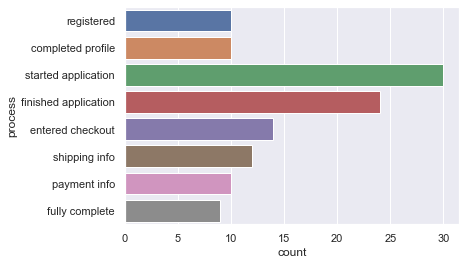

In [28]:
sns.set_theme(style="darkgrid")

ax = sns.countplot(y="process", data=df_cat_4, order=hues)

### Category 5

In [29]:
df_cat_5 = df[df["category"] == "5"]
print("Amount of entries for the category 5 product: " + str(len(df_cat_5)))
df_cat_5["process"].value_counts()

Amount of entries for the category 5 product: 11619


registered              2345
started application     1996
completed profile       1914
finished application    1609
entered checkout        1322
shipping info           1061
payment info             847
fully complete           525
Name: process, dtype: int64

In [30]:
# finding how far each unique user_id got in the process for category 5 products
# order follows above value count
for i in df_cat_5["process"].value_counts():
    z = i /len(df_cat_5["user_id"].unique())
    print(z)

0.9953310696095077
0.8471986417657046
0.8123938879456706
0.682937181663837
0.5611205432937182
0.450339558573854
0.3595076400679117
0.2228353140916808


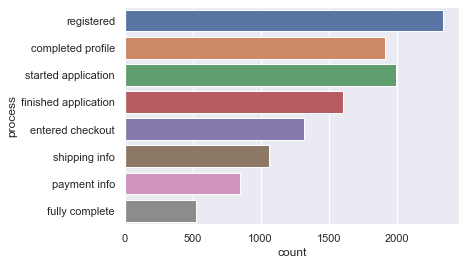

In [31]:
sns.set_theme(style="darkgrid")

ax = sns.countplot(y="process", data=df_cat_5, order=hues)

### Category 6

In [32]:
df_cat_6 = df[df["category"] == "6"]
print("Amount of entries for the category 6 product: " + str(len(df_cat_6)))
df_cat_6["process"].value_counts()

Amount of entries for the category 6 product: 133


started application     26
finished application    22
payment info            17
entered checkout        16
shipping info           14
registered              14
fully complete          13
completed profile       11
Name: process, dtype: int64

In [33]:
# finding how far each unique user_id got in the process for category 6 products
# order follows above value count
for i in df_cat_6["process"].value_counts():
    z = i /len(df_cat_6["user_id"].unique())
    print(z)

0.7878787878787878
0.6666666666666666
0.5151515151515151
0.48484848484848486
0.42424242424242425
0.42424242424242425
0.3939393939393939
0.3333333333333333


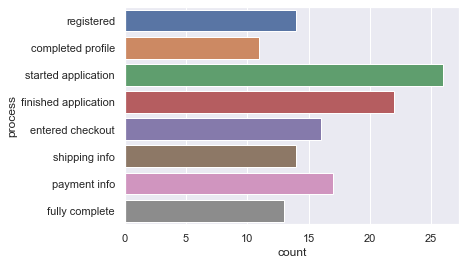

In [34]:
sns.set_theme(style="darkgrid")

ax = sns.countplot(y="process", data=df_cat_6, order=hues)

### Category 7

In [35]:
df_cat_7 = df[df["category"] == "7"]
print("Amount of entries for the category 7 product: " + str(len(df_cat_7)))
df_cat_7["process"].value_counts()

Amount of entries for the category 7 product: 806


started application     152
finished application    125
registered              120
completed profile       107
entered checkout         96
shipping info            87
payment info             70
fully complete           49
Name: process, dtype: int64

In [36]:
# finding how far each unique user_id got in the process for category 7 products
# order follows above value count
for i in df_cat_7["process"].value_counts():
    z = i /len(df_cat_7["user_id"].unique())
    print(z)

0.926829268292683
0.7621951219512195
0.7317073170731707
0.6524390243902439
0.5853658536585366
0.5304878048780488
0.4268292682926829
0.29878048780487804


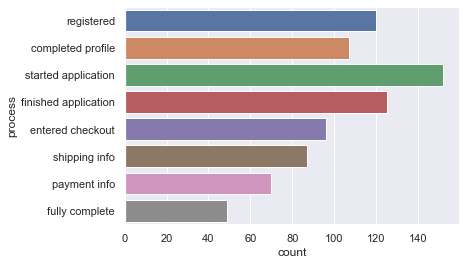

In [37]:
sns.set_theme(style="darkgrid")

ax = sns.countplot(y="process", data=df_cat_7, order=hues)

### Conclusion

After analyzing the data, I believe there are two inferences to be made about the acquisition funnel.

1) There is a problem with the completed profile section, and it appears to be a potential drop-off point in the acquisition funnel. If you look under the Total Values heading in the notebook, you will see a plot that shows how far each unique customer has got in the funnel process. You will see that the completed profile section has a low participation rate. Of the 5005 customers that have interacted with the website, only 4345 completed a profile, compared to the 4848 people who started the application process. 

In my opinion, this is happening because customers aren't incentivized to complete it. An example would be like having to fill out a profile before going into a grocery store to buy groceries or creating a profile before looking at items on Amazon. People want to find the right product - then they do what they need to do to buy the product. 

The solution to fixing this would be to move it later in the process - after you have completed the application and are excited to receive the product. It is possible this will improve conversion rates. It should be noted that this may also be just a simple technical error, but it is worth looking into. 

2) The second point I'd like to make is about the finished application portion. The numbers don't show an outlandish drop-off in that section, 4848 people started the application and 3650 finished the application, but it may be worthwhile for the product team to look into which specific page/section you are losing people on. It seems like you should be able to boost the number of finished applicants with a little more analysis. This may be reaching, but it may be beneficial towards boosting conversion rates. 

Overall I would say the process is performing well. About 25% of users who start the process, fully complete it. 

Additionally, I broke down the acquisition funnel rate into each unique category of product. I thought it would be interesting to see how each category's customers interacted with the purchasing process. That is a bit out of scope for this project, but I thought I would add it. 

TLDR; 
Seems to be a drop-off in the completed profile section - I would move it to the end of the process. I would also look at the finished application portion and find some reasons for the slight drop-off.    